<div align="center"> 
    <hr>
  <font size="6"><b>Dev | Clean-Clean Entity Resolution Notebook <br>with pre-trained embeddings and FAISS</b> </font>
   <hr>
</div>

In [1]:
!python --version

Python 3.9.1


In [23]:
import os
import sys
import pandas as pd
import networkx
from networkx import draw, Graph
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pyjedai.utils import (
    text_cleaning_method,
    print_clusters,
    print_blocks,
    print_candidate_pairs
)
from pyjedai.evaluation import Evaluation, write
from pyjedai.datamodel import Data
d1 = pd.read_csv("./data/test/ccer/abt_100.csv", sep='|', engine='python', na_filter=False).astype(str)
d2 = pd.read_csv("./data/test/ccer/buy_100.csv", sep='|', engine='python', na_filter=False).astype(str)
gt = pd.read_csv("./data/test/ccer/gt_100.csv", sep='|', engine='python')

# d1 = pd.read_csv("./data/ccer/D2/abt.csv", sep='|', engine='python', na_filter=False).astype(str)
# d2 = pd.read_csv("./data/ccer/D2/buy.csv", sep='|', engine='python', na_filter=False).astype(str)
# gt = pd.read_csv("./data/ccer/D2/gt.csv", sep='|', engine='python')


data = Data(dataset_1=d1,
            # attributes_1=['id','name','description'],
            id_column_name_1='id',
            dataset_2=d2,
            # attributes_2=['id','name','description'],
            id_column_name_2='id',
            ground_truth=gt)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Block Building

## FAISS

faiss.IndexIVFFlat is an implementation of an inverted file index with coarse quantization. This index is used to efficiently search for nearest neighbors of a query vector in a large dataset of vectors. Here's a brief explanation of the parameters used in this index:

- `d`: The dimension of the input vectors. Each input vector should have d elements.
- `nlist`: The number of cells (or clusters) to divide the dataset into. This determines the number of inverted lists in the index, and hence the maximum number of vectors that can be stored in the index. Larger values of nlist will generally result in more accurate search results, but may also increase the memory requirements of the index and the time required to perform searches.
- `quantizer`: An instance of a quantizer object that is used to compress the vectors before they are added to the index. The quantizer object should implement a train method that learns the quantization function from a set of input vectors, and a compress method that compresses a vector into an integer code. FAISS provides several built-in quantizer objects, such as IndexFlatL2 and IndexScalarQuantizer.
- `metric`: The distance metric used to measure the similarity between vectors. The metric should be one of the strings defined in the faiss.METRIC_TYPES list, such as "l2" for Euclidean distance or "ip" for inner product.
- `nprobe`: The number of cells (or clusters) to search during a query. This parameter determines the tradeoff between accuracy and speed during searches. Larger values of nprobe will generally result in more accurate search results, but may also increase the time required to perform searches.



In [38]:
from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

In [39]:
emb = EmbeddingsNNBlockBuilding(vectorizer='word2vec',
                                similarity_search='faiss')
blocks = emb.build_blocks(data, top_k=100, num_of_clusters=1)



Embeddings-NN Block Building [word2vec, faiss]:   0%|          | 0/200 [00:00<?, ?it/s]

Device selected:  cpu


In [40]:
emb.evaluate(blocks, with_classification_report=True, with_stats=True)

[autoreload of pyjedai.vector_based_blocking failed: Traceback (most recent call last):
  File "C:\Users\nikol\AppData\Roaming\Python\Python310\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\nikol\AppData\Roaming\Python\Python310\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib

***************************************************************************************************************************
                                         Μethod:  Embeddings-NN Block Building
***************************************************************************************************************************
Method name: Embeddings-NN Block Building
Parameters: 
	Vectorizer: word2vec
	Similarity-Search: faiss
	Top-K: 100
	Vector size: 300
Runtime: 92.6175 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.49% 
	Recall:       100.00%
	F1-score:       0.98%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 49
	False positives: 9951
	True negatives: 49
	False negatives: 0
	Total comparisons: 10000
────────────────────────────────────────────────────

[autoreload of pyjedai.vector_based_blocking failed: Traceback (most recent call last):
  File "C:\Users\nikol\AppData\Roaming\Python\Python310\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\nikol\AppData\Roaming\Python\Python310\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib

{'Precision %': 0.49,
 'Recall %': 100.0,
 'F1 %': 0.9752214150661758,
 'True Positives': 49,
 'False Positives': 9951,
 'True Negatives': 49,
 'False Negatives': 0}

# Entity Matching

In [105]:
from pyjedai.matching import EntityMatching

In [116]:
EM = EntityMatching(metric='cosine_vector_similarity',
                    similarity_threshold=0)

pairs_graph = EM.predict(blocks,
                         data,
                         tqdm_disable=True,
                         vectors_d1=emb.vectors_1,
                         vectors_d2=emb.vectors_2)

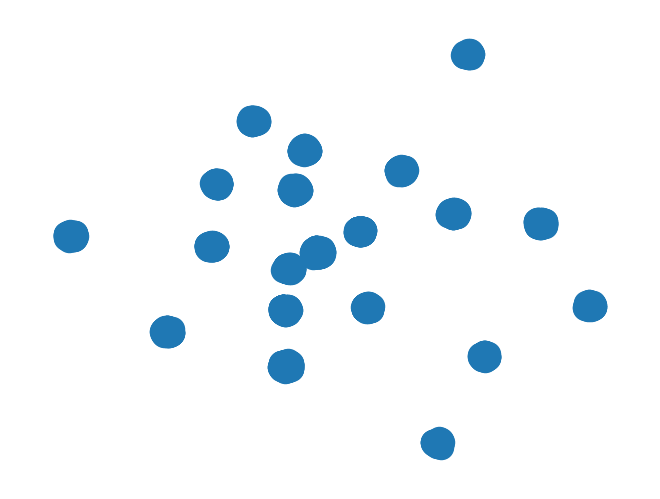

In [120]:
draw(pairs_graph)

In [121]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine_vector_similarity
	Attributes: None
	Similarity threshold: 0
Runtime: 9.1126 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.95% 
	Recall:        61.06%
	F1-score:       1.87%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 0.9484899231968587,
 'Recall %': 61.05947955390335,
 'F1 %': 1.8679631525076765,
 'True Positives': 657,
 'False Positives': 68611,
 'True Negatives': 1088746,
 'False Negatives': 419}

Distribution-% of predicted scores:  [0.0, 0.011549344574695386, 0.3291563203788185, 1.20113183576832, 5.5956574464399145, 18.011202864237454, 28.473465380839635, 29.37864526188139, 15.965525206444534, 0.7276087082058094]


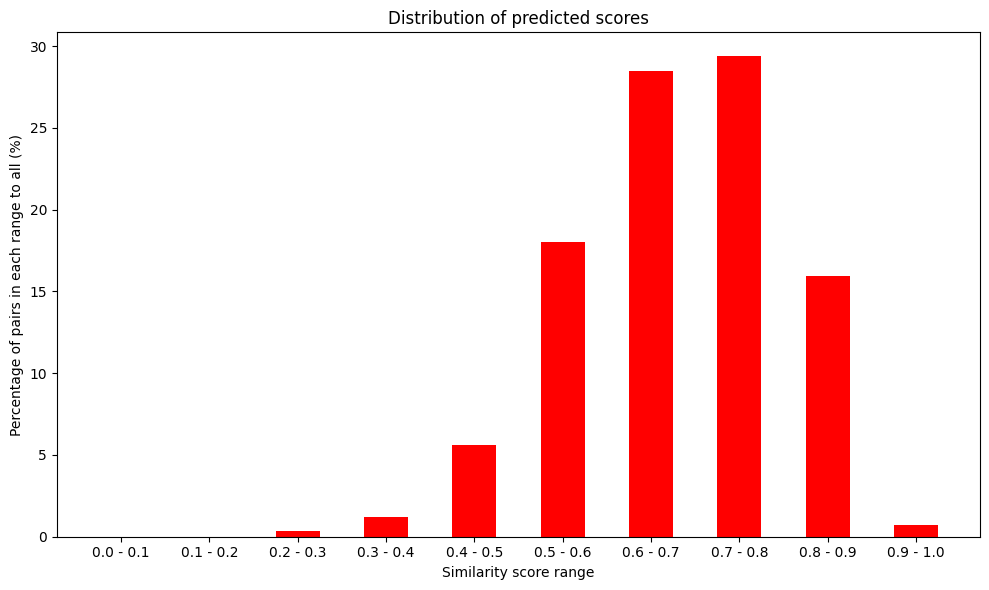

In [122]:
EM.plot_distribution_of_scores()

# Entity Clustering

In [129]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering

In [130]:
ccc = ConnectedComponentsClustering()
clusters = ccc.process(pairs_graph, data)

[{1025, 1026, 1527, 1029, 1544, 1036, 1549, 1041, 1553, 1052, 2084, 1062, 1063, 1064, 557, 1075, 1076, 1077, 1078, 1080, 2106, 1084, 1085, 1086, 1087, 1089, 1093, 1095, 584, 76, 1100, 1101, 1102, 596, 100, 615, 2151, 106, 116, 121, 1157, 134, 137, 654, 1167, 1169, 1179, 160, 1185, 1709, 192, 194, 1237, 1244, 1245, 227, 233, 248, 1275, 778, 783, 288, 295, 1334, 824, 312, 825, 828, 1341, 831, 834, 1346, 1874, 344, 860, 861, 869, 358, 365, 371, 373, 1413, 1414, 397, 403, 406, 407, 410, 411, 1440, 1456, 434, 953, 1982, 453, 461, 477, 1503, 998, 491, 1515, 505, 1010, 1013, 1014, 1015, 1016, 1017, 1018, 1020, 1021, 1022, 1023}, {522, 523, 1039, 2080, 2081, 1576, 558, 559, 565, 566, 567, 1079, 568, 569, 571, 2102, 2104, 578, 579, 580, 581, 582, 583, 1090, 2123, 590, 591, 2126, 1617, 1620, 1621, 1622, 1623, 600, 601, 1624, 1625, 1626, 1627, 2137, 607, 608, 2138, 610, 1639, 616, 617, 619, 1653, 1654, 1655, 1656, 634, 637, 648, 649, 650, 651, 652, 653, 1170, 1686, 665, 672, 673, 675, 678, 680, 6

In [111]:
ccc.report()

Method name: Connected Components Clustering
Method info: Gets equivalence clusters from the transitive closure of the similarity graph.
Parameters:  None
Runtime: 0.0160 seconds


In [125]:
ccc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Connected Components Clustering
***************************************************************************************************************************
Method name: Connected Components Clustering
Parameters: 
Runtime: 0.4562 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.00% 
	Recall:         0.00%
	F1-score:       0.00%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 0
	False positives: 0
	True negatives: 0
	False negatives: 0
	Total comparisons: 0
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 0,
 'Recall %': 0,
 'F1 %': 0,
 'True Positives': 0,
 'False Positives': 0,
 'True Negatives': 0,
 'False Negatives': 0}

In [ ]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering
umc = UniqueMappingClustering()
clusters = umc.process(pairs_graph, data)

In [ ]:
umc.evaluate(clusters, with_classification_report=True)